# YB 방학 세션_YB 커리큘럼 복습 스터디

# CH 02 사이킷런으로 시작하는 머신러닝

# 01 사이킷런 소개와 특징

사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다. 사이킷런은 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공한다. 물론 최근에는 텐서플로, 케라스 등 딥러닝 전문 라이브러리의 강세로 인해 대중적인 관심이 줄어들고는 있지만, 여전히 많은 데이터 분석가가 의존하는 대표적인 파이썬 ML 라이브러리이다.

사이킷런의 특징은 다음과 같다.

* 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공한다.
* 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다.
* 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리이다.

# 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
사이킷런을 통해 첫 번째로 만들어볼 머신러닝 모델은 붓꽃 데이터 세트로 붓꽃의 품종을 분류(Classification)하는 것이다. 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(feature)를 기반으로 꽃의 품종을 예측하기 위한 것이다.

분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나이다. 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 이때 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭한다.

먼저 새로운 주피터 노트북을 생성해 사이킷런에서 사용할 모듈을 임포트한다. 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있다. skelarn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임이다. sklearn.tree 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임이다. sklearn.model_selection은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임이다. 하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터 세트를 통칭하며 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다. 붓꽃 데이터 세트를 생성하는 데에는 load_iris()를 이용하며, ML 알고리즘은 의사 결정 트리(Decision Tree) 알고리즘으로, 이를 구현한 DecisionTreeClassifier을 적용한다.



In [ ]:
import sklearn

print(sklearn.__version__)

1.6.1


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
# 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데 train_test_split() 함수 사용
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩한다.
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target값:',iris_label)
print('iris target명:',iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   label  
0      0  
1      0  
2      0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


학습한 의사 결정 트리의 알고리즘 예측 정확도가 약 0.9333(93.33%)으로 측정됐다. 앞의 붓꽃 데이터 세트로 분류를 예측한 프로세스를 정리하면 다음과 같다.

1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측한다.
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.


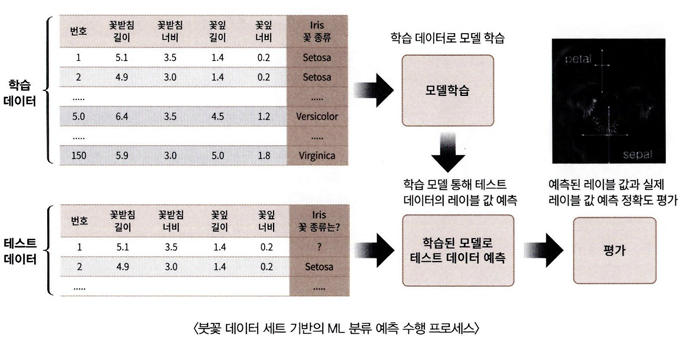

# 03 사이킷런의 기반 프레임워크 익히기

# Estimator 이해 및 fit(), predict() 메서드
사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공한다. 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환한다. 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다. 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공한다. 이 둘을 합쳐 Estimator 클래스라고 부른다. 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해 Estimator라고 부른다. 당연히 Estimator 클래스는 fit()과 predict()를 내부에서 구현하고 있다.

cross_val_score( )와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator을 인자로 받는다. 인자로 받은 Estiamtor에 대해서 cross_val_score( ), GridSearchCV.fit( ) 함수 내에서 이 Estimator의 fit( )과 predict( )를 호출해 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.

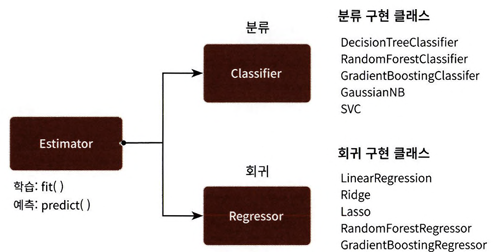

사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용한다. 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다. fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다. 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공한다.


# 사이킷런의 주요 모듈

다음은 사이킷런의 주요 모듈을 요약한 것이다.

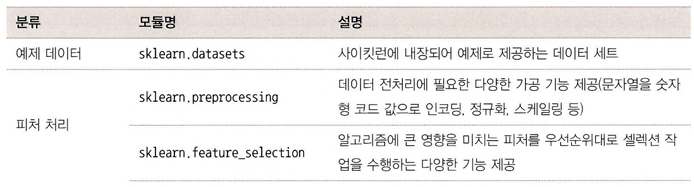

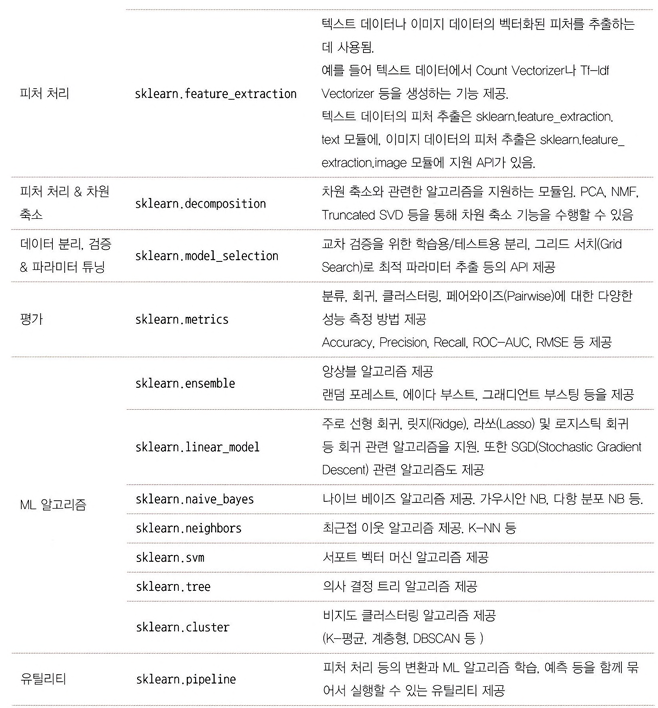

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것이다. 사이킷런 패키지는 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위해 매우 편리하고 다양하며 유연한 모델을 지원한다.

# 내장된 예제 데이터 세트

사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼 있다. 이 데이터는 datasets 모듈에 있는 여러 API를 호출해 만들 수 있다. 사이킷런에 내장 되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나뉘어진다.

분류나 회귀 연습용 예제 데이터

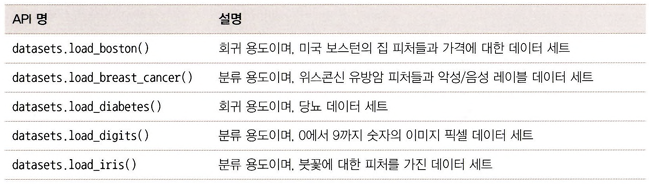

# 교차 검증

알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하지만, 이 방법 역시 overfitting에 취약한 약점을 가질 수 있다. 과적합은 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 것을 말한다. 그런데 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생긴다. 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하된다. 이러한 문제점을 개선하기 위해 교차검증을 이용해 더 다양한 학습과 평가를 수행한다.

ML은 데이터에 기반하며 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러 가지 ML에 영향을 미치는 요소를 갖고 있다. 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어질 것이다.

교차 검증은 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼 파리미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.

대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스이다. ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있다. 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.

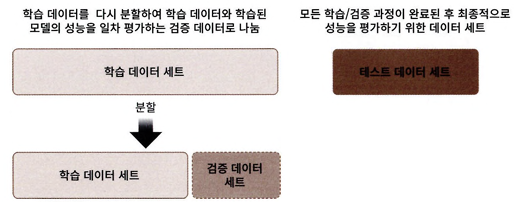

## K 폴드 교차 검증

K 폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법이다. 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.

다음 그림은 5 폴드 교차 검증을 수행한다.(즉, K가 5). 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가한다. 먼저 데이터 세트를 K등분(5등분)한다. 그리고 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 등분 하나를 검증 데이터 세트로 설정하고 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행한다. 첫 번째 평가를 수행하고 나면 이제 두 번째 반복에서 다시 비슷한 학습과 평가 작업을 수행한다. 단, 이번에는 학습 데이터와 검증 데이터를 변경한다(처음부터 3개 등분까지, 그리고 마지막 5번째 등분을 학습 데이터 세트로, 4번째 등분 하나를 검증 데이터 세트로 설정).

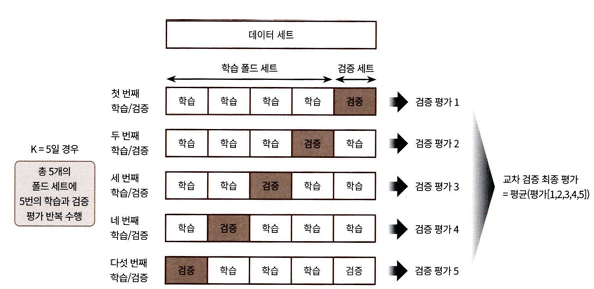

## Stratified K 폴드
Stratified K 폴드는 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식이다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.

가령 대출 사기 데이터를 예측한다고 가정해보자. 이 데이터 세트는 1억 건이고, 수십 개의 피처와 대출 사기 여부를 뜻하는 레이블(대출 사기: 1, 정상 대출: 0)로 구성되어 있다. 그런데 대부분의 데이터는 정상 대출일 것이다. 그리고 대출 사기가 약 1000건이 있다고 하면 전체의 0.0001%의 아주 작은 확률로 대출 사기 레이블이 존재한다. 이렇게 작은 비율로 1 레이블 값이 있다면 K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생한다. 즉, 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 상대적으로 많이 들어 있고, 다른 반복 학습/테스트 데이터 세트에는 그렇지 못한 결과가 발생한다. 대출 사기 레이블이 1인 레코드는 비록 건수는 작지만 알고리즘이 대출 사기를 예측하기 위한 중요한 피처 값을 가지고 있기 때문에 매우 중요한 데이터 세트이다. 따라서 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요하다.

Stratified K 폴드는 이처럼 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 준다. 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다. 먼저 K 폴드가 어떤 문제를 가지고 있는지 확인해보고 이를 사이킷런의 StratifiedKFold 클래스를 이용해 개선해보자. 이를 위해 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성하고 레이블 값의 분포도를 확인한다.

3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.67%로 측정되었다. Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 한다. 사실, 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할되어야 한다. 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다. 다음으로 이러한 교차 검증을 보다 간편하게 제공해주는 사이킷런의 API를 살펴보자.

## 교차 검증을 보다 간편하게 - cross_val_score()
사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공한다. 대표적인 것이 cross_val_score()이다. KFold로 데이터를 학습하고 예측하는 코드를 보면 먼저 1. 폴드 세트를 설정하고 2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환했다.

cross_val_score()는 이런 일련의 과정을 한꺼번에 수행해주는 API이다. 다음은 cross_val_score() API의 선언 형태이다.


```
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
```

이 중 estimator, X, y, scoring, cv가 주요 파라미터이다.

estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미하고, X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표를 기술하며, cv는 교차 검증 폴드 수를 의미한다. cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다. cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.(회귀의 경우는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다).

다음 코드에서 cross_val_score()의 자세한 사용법을 살펴보자. 교차 검증 폴드 수는 3, 성능 평가 지표는 정확도인 accuracy로 하겠다.

# GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.

사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.(Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식이다). 예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행할 수 있다.

하이퍼 파라미터는 다음과 같이 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있다.

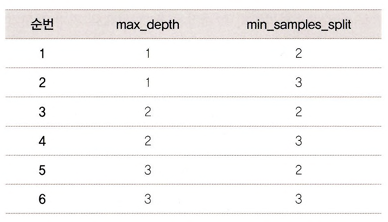

GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다. GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸린다.

GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터는 다음과 같다.

* estimator: classifier, regressor, pipeline 등
* param_grid: key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
* scoring: 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정
* cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
* refit: default가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습

간단한 예제를 통해 GridSearchCV API의 사용법을 익혀보자. 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터를 예측 분석하는 데 GridSearchCV를 이용해보자. 결정 트리 알고리즘을 구현한 DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화시키면서 최적화를 진행한다. 테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미터의 명칭은 문자열 Key 값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정한다.

# 05 데이터 전처리

데이터 전처리(Data Preprocessing)는 ML 알고리즘만큼 중요하다. ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.(Garbage In, Garbage Out). 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항이 있다.

결손값, 즉 NaN, Null 값은 허용되지 않는다. 따라서 이러한 Null 값은 고정된 다른 값으로 변환해야 한다. Null 값을 어떻게 처리해야 할지는 경우에 따라 다르다. 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체할 수 있다. 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다. 가장 결정이 힘든 부분이 Null 값이 일정 수준 이상 되는 경우다. 정확히 몇 퍼센트까지를 일정 수준 이상이라고 한다는 기준은 없다. 하지만 해당 피처가 중요도가 높은 피처이고 Null을 단순히 피처의 평균값으로 대체할 경우 예측 왜곡이 심할 수 있다면 업무 로직 등을 상세히 검토해 더 정밀한 대체 값을 선정해야 한다.

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다. 카테고리형 피처는 코드 값으로 표현하는 게 더 이해하기 쉬울 것이다. 텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나('텍스트 분석' 장에서 피처 벡터화에 대해 별도로 설명) 불필요한 피처라고 판단되면 삭제하는 게 좋다.

# 데이터 인코딩

머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있다. 먼저 레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다. 예를 들어 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서 값으로 돼 있다면 TV:1. 냉장고:2, 전자레인지:3, 컴퓨터:4, 선풍기:5, 믹서:6과 같은 숫자형 값으로 변환하는 것이다. 약간 주의해야 할 점은 '01','02'와 같은 코드 값 역시 문자열이므로 1,2와 같은 숫자형 값으로 변환돼야 한다.

## 레이블 인코딩

사이킷런의 레이블 인코딩(Label encoding)은 LabelEncoder 클래스로 구현한다. LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행한다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


## 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

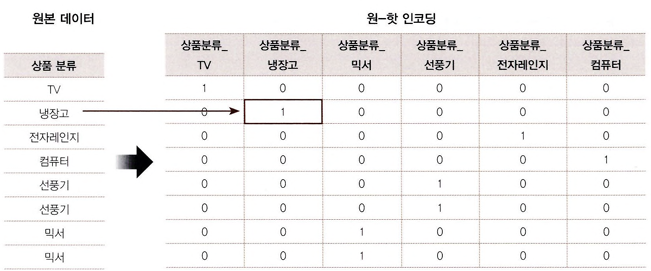

먼저 원본 데이터는 8개의 레코드로 돼 있으며, 고유 값은 ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']로 모두 6개이다. 0부터 5까지 6개의 상품 분류 고유 값에 따라 상품 분류 피처를 6개의 상품 분류 고유 값 피처로 변환한다. 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시) 인코딩으로 명명하게 됐다.

원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 변환이 가능하다. 단, LabelEncoder와 다르게 약간 주의할 점이 있다. 입력값으로 2차원 데이터가 필요하다는 것과, OneHotEncoder를 이용해 변환한 값이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 toarray() 메서들를 이용해 밀집 행렬(Dense Matrix)로 변환해야 한다는 것이다. OneHotEncoder를 이용해 앞의 데이터를 원-핫 인코딩으로 변환해 보자.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환한다.
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용한다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


# 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메서드를 이용한다. 일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환한다. 그리고 fit_transform()은 fit()과 transform()을 한 번에 적용하는 기능을 수행한다.

그런데 학습 데이터 세트와 테스트 데이터 세트에 이 fit()과 transform()을 적용할 때 주의가 필요하다. Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것이다. 즉 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

다음 코드를 통해서 테스트 데이터에 fit()을 적용할 때 어떠한 문제가 발생하는지 알아보겠다. 먼저 np.arange()를 이용해 학습 데이터를 0부터 10까지, 테스트 데이터를 0부터 5까지 값을 가지는 ndarray로 생성하겠다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

학습 데이터인 train_array부터 MinMaxSclaer를 이용해 변환하자. 학습 데이터는 0부터 10까지 값을 가지는데, 이 데이터에 MinMaxScaler 객체의 fit()을 적용하면 최솟값 0, 최댓값 10이 설정되며 1/10 Scale이 적용된다. 이제 transform()을 호출하면 1/10 scale로 학습 데이터를 변환하게 되며 원본 데이터 1은 0.1로 2는 0.2, 그리고 5는 0.5, 10은 1로 변환된다.

In [ ]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


# CH 03 평가

머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가(Evaluation)의 프로세스로 구성된다. 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있다. 성능 평가 지표(Evaluation Metric)는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉜다. 회귀의 경우 대부분 실제 값과 예측값의 오차 평균값에 기반한다. 예를 들어 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 평균 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다.

분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있다. 본 장에서는 분류에 사용되는 성능 평가 지표에 대해서 집중적으로 설명하겠다. 특히 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 지표에 대해서 집중적으로 설명하겠다. 0이냐, 1이냐 혹은 긍정/부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많다.

**분류의 성능 평가 지표**

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어
* ROC AUC

분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 **이진 분류**와 여러 개의 결정 클래스 값을 가지는 **멀티 분류**로 나뉠 수 있다. 위에서 언급한 분류의 성능 지표는 이진/멀티 분류 모두에 적용되는 지표이지만, 특히 이진 분류에서 더욱 중요하게 강조하는 지표이다. 다음 절에서 왜 이 지표가 모두 이진 분류에서 중요한지 설명한다.

# 01 정확도(Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이다.

$ 정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $

정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다. 정확도 지표가 어떻게 ML 모델의 성능을 왜곡하는지 예제로 살펴보자.

앞의 타이타닉 예제 수행 결과를 보면 ML 알고리즘을 적용한 후 예측 정확도의 결과가 보통 80%대였지만, 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있다. 단지 성별 조건 하나만을 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황이 발생하는 것이다.

다음 예제에서는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성한다. 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자 생성할 수 있다. 생성할 MyDummyClassifier 클래스는 학습을 수행하는 fit() 메서드는 아무것도 수행하지 않으며 예측을 수행하는 predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classfier이다.

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range (X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

# 02 오차 행렬

이진 분류에서 성능 지표로 잘 활용되는 오차행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다. 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.

오차 행렬은 다음과 같은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative와 Positive로 분류하고, 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면을 채울 수 있다. TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있는 것이다.

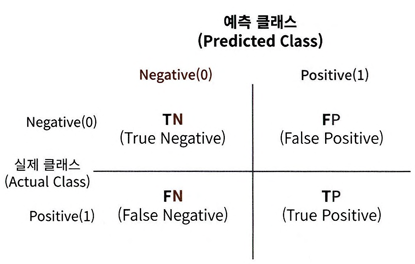

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값(값 1)과 Negative 결정 값(값 0)의 결합에 따라 결정된다. 예를 들어 TN은 True Negative의 의미이며 앞 True는 예측 클래스 값과 실제 클래스 값이 같다는 의미고 뒤의 Negative는 예측값이 Negative 값이라는 의미이다. 즉, TN은 예측을 Negative 값 0으로 예측했는데, 실제 값도 Negative 값 0이라는 의미이다. TN, FP, FN, TP 기호가 의미하는 것은 앞 문자 True/False는 예측값과 실제값이 '같은가/틀린가'를 의미한다. 뒤 문자 Negative/Positive는 예측 결과 값이 부정(0)/긍정(1)을 의미한다.

* TN는 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
* FN은 예측값을 Negativ 값 0으로 예측했는데 실제 값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1


다음 그림은 TN, FP, FN, TP 구분을 재미있게 표현해서 발췌했다.

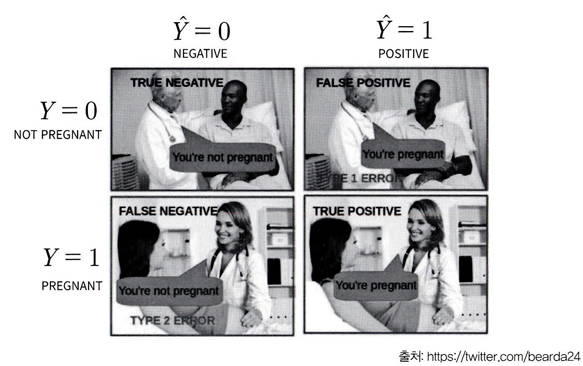

**정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)**

일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0 값을 부여하는 경우가 많다. 예를 들어 사기 행위 예측 모델에서는 사기 행위가 Positive 양성으로 1, 정상 행위가 Negative 음성으로 0 값이 결정 값으로 할당되거나 암 검진 예측 모델에서는 암이 양성일 경우 Positive 양성으로 1, 암이 음성일 경우 Negative 음성으로 0값이 할당되는 경우가 일반적이다.

불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다. 10,000건의 데이터 세트에서 9,900건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 된다. 또한 Negative로 예측할 때 정확도가 높기 때문에 FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positve로 예측하는 경우가 작기 때문에 FP 역시 매우 작아진다. 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 된다.

정확도는 분류(Classification) 모델의 성능을 측정할 수 있는 한 가지 요소일 뿐이다. 불균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있는 사례를 봤다. 다음으로 불균형한 데이터 세트에서 정확도보다 더 선호되는 평가 지표인 정밀도(Precision)와 재현율(Recall)에 대해 알아보자.

# 03 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다. 앞서 만든 MyFakeClassifier는 Positive로 예측한 TP 값이 하나도 없기 때문에 정밀도와 재현율 값이 모두 0이다.

정밀도와 재현율은 다음과 같은 공식으로 계산된다.

**정밀도 = TP / (FP + TP)**

**재현율 = TP / (FN +TP)**

정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. 공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며, 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 **양성 예측도**라고도 불린다.

재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. 공식의 분모인 FN + TP는 실제 값이 Positive인 모든 데이터 건수이며 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. **민감도(Sensitivity) 또는 TPR(True Positive Rate)**라고도 불린다.

정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있다. **재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를  Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우다.** 예를 들어 암 판단 모델은 재현율이 훨씬 중요한 지표이다. 왜냐하면 실제 Positive인 암 환자를 Positive 양성이 아닌 Negative 음성으로 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각하기 때문이다. 반면에 실제 Negative인 건강한 환자를 암 환자인 Positive로 예측한 경우면 다시 한번 재검사를 하는 수준의 비용이 소모될 것이다.

보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요하다. 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것이다. 반면에 정상 금융거래인 Negative를 금융사기인 Positive로 잘못 판단하더라도 다시 한번 금융 사기인지 재확인하는 절차를 가동하면 된다. 물론 고객에게 금융 사기 혐의를 잘못 씌우면 문제가 될 수 있기에 정밀도도 중요 평가 지표지만, 업무적인 특성을 고려하면 재현율이 상대적으로 더 중요한 지표이다.

보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만, 정밀도가 더 중요한 지표인 경우도 있다. 예를 들어 스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생긴다.

* 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우

* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

다시 한번 재현율과 정밀도의 공식을 살펴보면, 재현율 = TP / (FN + TP), 정밀도 = TP / (FP + TP)이다. 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춘다. 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다. 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다. 반면에 둘 중 어느 한 편가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않다.

# 정밀도와 재현율의 맹점
Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 임곗값의 변경은 두 개의 수치를 상호 보완할 수준에서 적용되어야 한다. 그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안된다. 다음은 정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법이지만 숫자 놀음에 불과한 방법이다.

## 정밀도가 100%가 되는 방법
확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다. 예를 들어 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건 Positive, 다른 경우는 Negative로 예측하는 것이다.

정밀도 = TP / (TP + FP)이다. 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 된다.

## 재현율이 100%가 되는 방법
모든 환자를 Positive로 예측하면 된다. 재현율 = TP / (TP +FN)이므로 전체 환자 1000명을 다 Positive로 예측하는 것이다. 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30+0)으로 100%가 된다.

이처럼 정밀도와 재현율 수치는 어느 한 쪽만 참조하면 극단적인 수치 조작이 가능하다. 따라서, 정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주할 수 있다. 따라서, 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상항에 맞는 분류 알고리즘을 튜닝할 수 있지만, 그렇다고 정밀도/재현율 중 하나만 강조하는 상황이 되어서는 안 된다.

정밀도와 재현율의 수치가 적절하게 조합되어 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요하다.

# 04 F1 스코어
F1 스코어(score)는 정밀도와 재현율을 결합한 지표이다. F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 갖는다. F1 스코어의 공식은 다음과 같다.

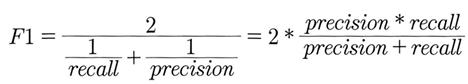

만일 A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 정밀도와 재현율이 큰 차이가 없다면 A 예측 모델의 F1 스코어는 0.18이고, B 예측 모델의 F1 스코어는 0.5로 B 모델이 A 모델에 비해 매우 우수한 F1 스코어를 가지게 된다.

# ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC 곡선(Receiver Operation Characteristic Curve)은 수신자 판단 곡선으로 불리며, 머신러닝의 이진 분류 모델의 예측 성능을 평가하는 중요한 평가 지표이다. ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다. FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.

TPR은 재현율을 나타내며, TP/(FN+TP)로 구한다. TPR은 민감도라고도 불리는데 민감도에 대응하는 지표로는 TNR이라고 불리는 특이성(Specificity)가 있다.

* 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측되어야 하는 수준을 나타낸다. (질병이 있는 사람은 질병이 있는 것으로 양성 판정)
* 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측되어야 하는 수준을 나타낸다. (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

TNR인 특이성은 다음과 같이 구할 수 있다. TNR = TN/(FP+TN)

그리고 ROC 곡선의 X축 기준인 FPR(False Positive Rate)은 FP/(FP+TN) 이므로 1-TNR 또는 1-특이성 으로 표현된다.

**FPR = FP / (FP+TN) = 1 - TNR = 1 - 특이성**

ROC 곡선은 가운데 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 뛰어나다.

ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구한다. 따라서, 분류 결정 임곗값을 변경하는 것이다. 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이기 때문에 FPR을 0으로 만드려면 임곗값을 1로 지정하면 된다. 임곗값을 1로 지정하면 Positive 예측 기준이 매우 높아 Classifier가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문이다. 즉, 아예 Positive로 예측하지 않기 때문에 FP 값은 0이 되므로 FPR은 0이 된다.

FPR을 1로 만들기 위해서는 TN을 0으로 만들면 되고, 이를 위해서는 분류 결정 임곘값을 0으로 지정하면 된다. 그럼 Classifier의 Positive 확률 기준이 너무 낮아 모두 Positive로 예측한다. 그럼 아예 Negative 예측이 없기에 TN은 0이 되고 FPR은 1이 된다.

이처럼 임곗값을 1부터 0까지 변화시키며 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선이다.

사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다. 사용법은 precision_recall_curve()와 유사하다. 단지 반환값이 FPR, TPR, 임곗값으로 구성되어 있다.

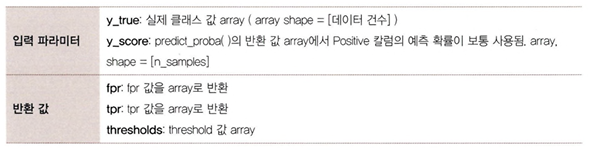

# CH 04 분류

# 01 분류(Classificaion)의 개요

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다. 지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다. 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다.

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.

* 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)

* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)

* 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)

* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)

* 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘

* 심층 연결 기반의 신경망(Neural Network)

* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

앙상블은 분류에서 가장 각광을 받는 방법 중 하나이다. 물론 이미지, 영상, 음성, NLP 영역에서 신경망에 기반한 딥러닝이 머신러닝계를 선도하고 있지만, 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 많은 많은 분석가와 데이터 과학자들에게 애용되고 있다.

앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다. 배깅 방식의 대표인 랜덤 포레스트(Random Forest)는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘이다. 하지만 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전하고 있다. 부스팅의 효시라고 할 수 있는 그래디언트 부스팅(Gradient Boosting)의 경우 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠다. 하지만 XgBoost(eXtra Gradient Boost)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡았다.

이 장에서는 앙상블 방법의 개요와 랜덤 포레스트, 그래디언트 부스팅의 전통적인 앙상블 기법뿐만 아니라 부스팅 계열의 최신 기법인 XGBoost와 LightGBM, 그리고 앙상블의 앙상블이라고 불리는 스태킹(Stacking) 기법에 대해서도 상세히 알아보자. 앙상블은 서로 다른/또는 같은 알고리즘을 결합한다고 했는데, 대부분은 동일한 알고리즘을 결합한다. 앙상블의 기본 알고리즘으로 일반작으로 사용하는 것은 결정 트리이다.

결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘이다. 또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있다. 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용한다. 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 학습기가 되기 때문이다.

앙상블을 학습하기 전에 먼저 결정 트리가 무엇이고 어떤 특성이 있는지 살펴보자.

# 02 결정 트리

결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데, 쉽게 생각하면 스무고개 게임과 유사하며 룰 기반의 프로그램에 적용되는 if, else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘으로 이해하면 더 쉽게 다가올 것이다. 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

다음 그림은 결정 트리의 구조를 간략하게 나타낸 것이다. 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노즈(Leaf Node)로 표시된 노드느 결정된 클래스 값이다. 그리고 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성된다. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다. 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉽다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

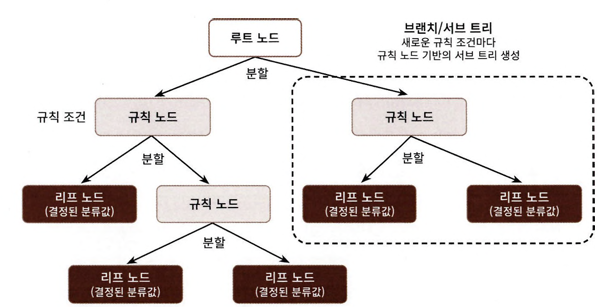

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도로 결정 노드의 규칙이 정해져야 한다. 이를 위해서는 어떻게 트리를 분할(Split)할 것인가가 중요한데 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

먼저 균일한 데이터 세트가 어떤 것을 의미하는지 다음 그림을 통해 살펴보자.

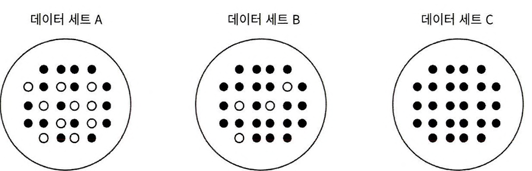

C가 가장 균일도가 높고 그다음 B, 마지막으로 A 순이다. C의 경우 모두 검은 공으로 구성되므로 데이터가 모두 균일하다. B의 경우는 일부 하얀 공을 가지고 있지만, 대부분 검은 공으로 구성되어 다음으로 균일도가 높다. A의 경우는 검은 공 못지않게 많은 하얀 공을 가지고 있어 균일도가 제일 낮다. 이러한 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다. 가령 눈을 가린 채 데이터 세트 C에서 하나의 데이터를 뽑았을 때 데이터에 대한 별다른 정보 없이도 '검은 공'이라고 쉽게 예측할 수 있다. 하지만 A의 경우는 상대적으로 혼잡도가 높고 균일도가 낮기 때문에 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요하다.

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만는다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다. 예를 들어 박스 안에 30개의 레고 블록이 있는데, 각 레고 블록은 '형태' 속성으로 동그라미, 네모, 세모, '색깔' 속성으로 노랑, 빨강, 파랑이 있다. 이 중 노랑색 블록의 경우 모두 동그라미로 구성되고, 빨강과 파랑 블록의 경우는 동그라미, 네모, 세모가 골고루 섞여 있다고 한다면 각 레고 블록을 형태와 색깔 속성으로 분류하고자 할 때 가장 첫 번째로 만들어져야 하는 규칙 조건은 if 색깔 =='노란색'이 될 것이다. 왜냐하면 노란색 블록이면 모두 노란 동그라미 블록으로 가장 쉽게 예측할 수 았고, 그다음 나머지 블록에 대해 다시 균일도 조건을 찾아 분류하는 것이 가장 효율적인 분류 방식이기 때문이다.

이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수가 있다.

* 정보 이득은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉 1-엔트로피 지수이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, **정보 이득이 높은 속성을 기준**으로 분할한다.

* 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수이다. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 **지니 계수가 낮은 속성을 기준**으로 분할한다.

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다. 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

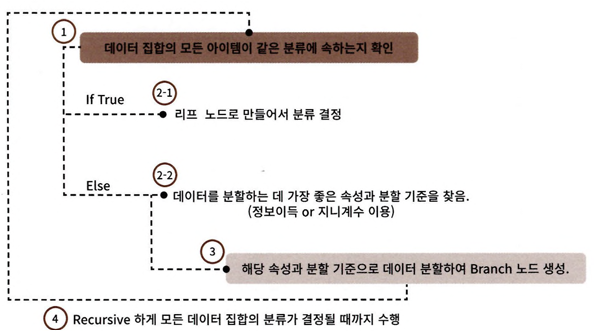

# 결정 트리 모델의 특징

결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점이다. 결정 트리가 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현까지 할 수 있다. 또한 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다. 반면에 결정 트리 모델의 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없다.

모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 오히려 더 많음에도 불구하고 결정 트리는 학습 데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 계속 커지고, 결과적으로 복잡한 학습 모델에 이르게 된다. 복잡한 학습 모델은 결국에는 실제 상황에(테스트 데이터 세트) 유연하게 대처할 수 없어서 예측 성능이 떨어질 수밖에 없다. 차라리 모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없다고 먼저 인정하는 편이 더 나은 성능을 보장할 수 있다. 즉, 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 된다.


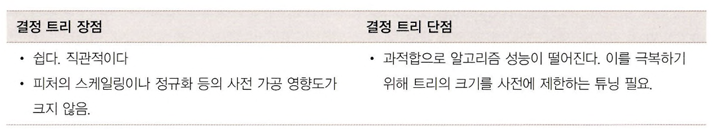

# 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공한다. DecisionTreeClassifier는 분류를 위한 클래스이며, DecisionTreeRegressor는 회귀를 위한 클래스이다. 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반이다. CART는 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘이다. 여기서는 분류를 위한 DecisionTreeClassifier 클래스만 다루겠다. DecisionTreeClassifier와 DecisionTreeRegressor 모두 파라미터는 다음과 같이 동일한 파라미터를 사용한다.

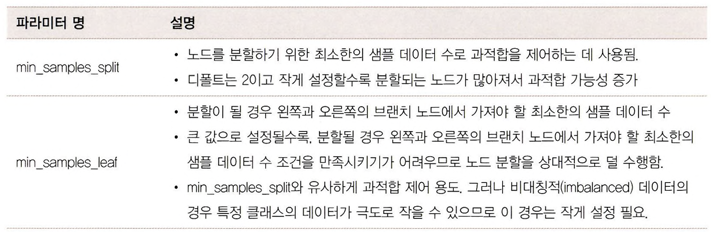

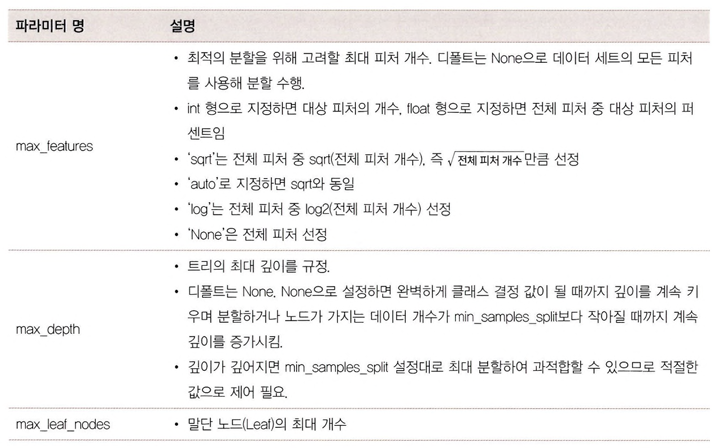

# 03 앙상블 학습

# 앙상블 학습 개요

앙상블 학습(Ensenble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다. 어려운 문제의 결론을 내기 위해 여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하고 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것이다.

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있다. 앙상블 알고리즘의 대표격인 랜덤 포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 그간 분석가 및 데이터 과학자들 사이에서 많이 애용됐다. 부스팅 계열의 앙상블 알고리즘의 인기와 강세가 계속 이어져 기존의 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘의 개발이 가속화됐다. 데이터 과학자들이 기량을 겨루는 오픈 플랫폼인 캐글(Kaggle)에서 '매력적인 솔루션'으로 불리는 XGBoost, 그리고 XGBoost와 유사한 예측 성능을 가지면서도 훨씬 빠른 수행 속도를 가진 LightGBM, 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 스태킹(Stacking)을 포함해 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있다. XGBoost, LightGBM과 같은 최신의 앙상블 모델 한두 개만 잘 알고 있어도 정형 데이터의 분류나 회귀 분야에서 예측 성능이 매우 뛰어난 모델을 쉽게 만들 수 있다. 그만큼 쉽고 편하면서도 강력한 성능을 보유하고 있는 것이 바로 앙상블 학습의 특징이다.

앙상블 학습의 유형은 전통적으로 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며, 이 외에도 스태킹을 포함한 다양한 앙상블 방법이 있다. 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다. 대표적인 배깅 방식이 바로 랜덤 포레스트 알고리즘이다.

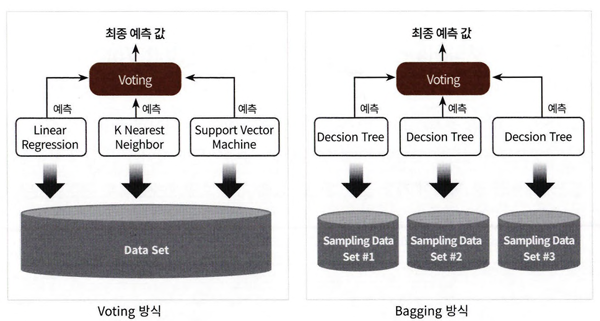

왼쪽 그림은 보팅 분류기를 도식화한 것이다. 선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식이다.

오른쪽 그림은 배깅 분류기를 도식화한 것이다. 단일 ML 알고리즘(결정 트리)으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다르다. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 부른다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 해서 최종 예측 결과를 선정하는 방식이 바로 배깅 앙상블 방식이다. 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다. 따라서 10000개의 데이터를 10개의 분류기가 배깅 방식으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있다.

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것이다. 계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불린다. 예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있다.

스태킹은 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.

# 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

보팅 방법에는 두 가지가 있다. 하드 보팅과 소프트 보팅이다. 하드 보팅을 이용한 분류(Classification)는 다수결 원칙과 비슷하다. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것이다. 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. 일반적으로 소프트 보팅이 보팅 방법으로 적용된다.

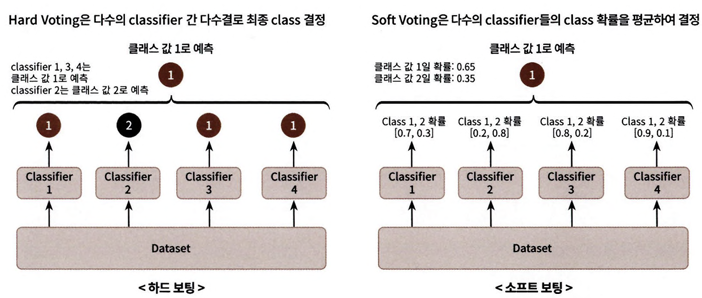

왼쪽 그림은 하드 보팅이다. Classifier 1번, 2번, 3번, 4번인 4개로 구성한 보팅 앙상블 기법에서 분류기 1번, 3번, 4번이 1로 레이블 값을 예측하고 분류기 2번이 2로 레이블 값을 예측하면 다수결 원칙에 따라서 최종 예측은 1이 된다.

오른쪽 그림은 소프트 보팅이다. 소프트 보팅은 각 분류기의 레이블 값 예측 확률을 평균 내어 최종 결정한다. 가령 분류기 1의 레이블 값 1과 2의 예측 확률이 각각 0.7/0.3이고 분류기 2번은 0.2/0.8, 분류기 3번은 0.8/0.2, 분류기 4번은 0.9/0.1이라면 레이블 값 1의 평균 예측 확률은 분류기 1번, 2번, 3번, 4번의 확률을 모두 더하여 평균하면 (0.7+0.2+0.8+0.9)/4=0.65가 된다. 레이블 값 2의 평균 예측 확률도 같은 방법으로 계산하면 (0.3+0.8+0.2+0.1)/4=0.35가 된다. 따라서 레이블 1값의 확률이 0.65로 레이블 값 2인 확률 0.35보다 크므로 레이블 값 1로 최종 보팅하는 것이 소프트 보팅이다. 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용된다.

# 04 랜덤 포레스트

# 랜덤 포레스트의 개요 및 실습

배깅(Bagging)은 보팅과 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘이다. 배기의 대표적인 알고리즘은 랜덤 포레스트이다. 랜덤 포레스트는 다재 다능한 알고리즘이다. 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있다. 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있다(랜덤 포레스트뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택하고 있다).

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.


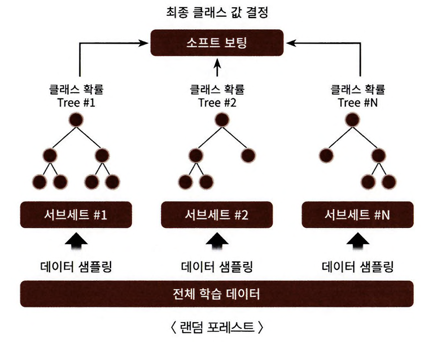

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터 세트에서 일부가 중첩되게 샘플링된 데이터 세트이다. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 한다(그래서 배깅(Bagging)이 bootstrap aggregating의 줄임말이다). 원래 부트스트랩은 통계학에서 여러 개의 작은 데이터 세트를 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 지칭한다. 랜덤 포레스트의 서브세트(Subset) 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어진다. 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어진다. 원본 데이터의 건수가 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimator=3으로 하이퍼 파라미터를 부여하면 다음과 같이 데이터 서브세트가 만들어진다.

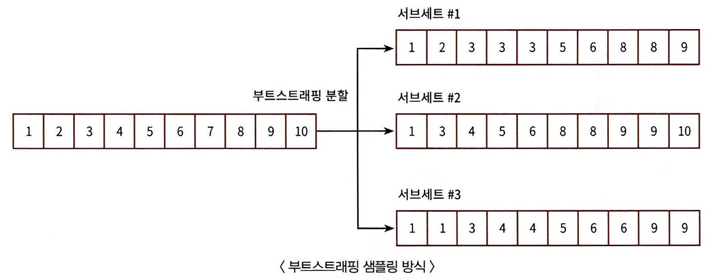

# 06 XGBoost(eXtra Gradient Boost)

XGBoost 개요

XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다. 압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타낸다. XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해서 매우 각광을 받고 있다. 특히 XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다. 다음은 XGBoost의 주요 장점이다.

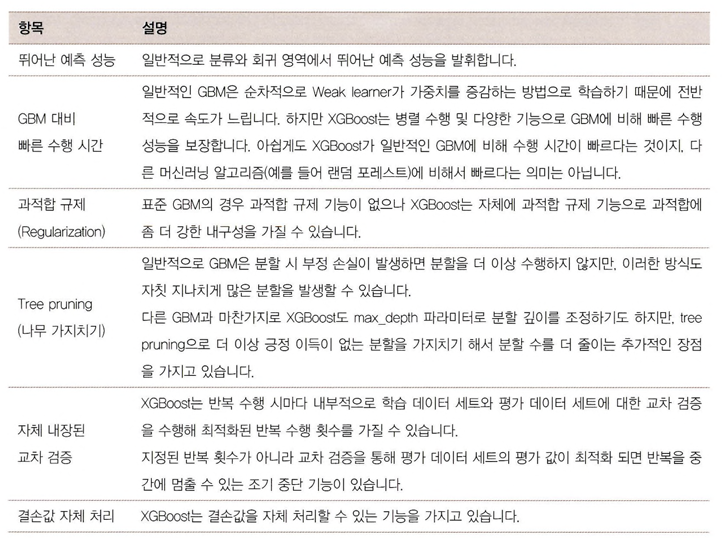